<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_13_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

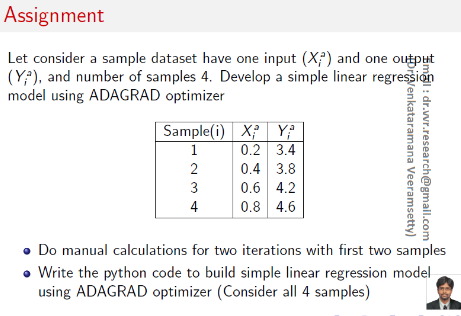

In [42]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6
4,5,1.0,5.0


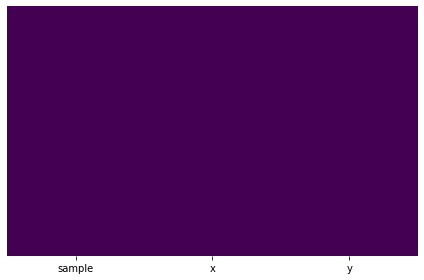

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [45]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.x, df.y, test_size = 0.20, random_state = 3)

In [46]:
x_train

4    1.0
1    0.4
0    0.2
2    0.6
Name: x, dtype: float64

In [47]:
y_train

4    5.0
1    3.8
0    3.4
2    4.2
Name: y, dtype: float64

In [48]:
x1=[]
y1=[]
for i,j in zip(x_train,y_train):
  x1.append(i)
  y1.append(j)

In [49]:
x1

[1.0, 0.4, 0.2, 0.6]

In [50]:
y1

[5.0, 3.8, 3.4, 4.2]

In [51]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
learning_rate=0.1
epochs=150
gama=0.9
iter=1
sample=1
Gm = Gc = 0 #sum of squares of gradient
ns = len(x1) #number of samples in training dataset
ep = 10**(-8)

while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    
    derivE_m = derivE_m.subs(x,x1[sample-1])
    derivE_m = derivE_m.subs(y,y1[sample-1])

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,x1[sample-1])
    derivE_c = derivE_c.subs(y,y1[sample-1])

    gm = derivE_m
    gc = derivE_c

    #step 5 
    Gm = Gm + (gm**2)
    Gc = Gc + (gc**2)

    #step 6 - change in model params
    delta_m = (-1.0)*(learning_rate/(Gm+ep)**(0.5))*derivE_m
    delta_c = (-1.0)*(learning_rate/(Gc+ep)**(0.5))*derivE_c

    #step 6 update model params
    mi = mi+delta_m
    ci = ci+delta_c
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

ITERATION 1
Sample 1
1.09999999998000
-0.900000000020000
-----------------------------------
Sample 2
1.13225814180728
-0.835146819868662
-----------------------------------
Sample 3
1.14726387934205
-0.783053868356928
-----------------------------------
Sample 4
1.19070452601643
-0.734320202280187
-----------------------------------
ITERATION 2
Sample 1
1.25151306061881
-0.688494262820582
-----------------------------------
Sample 2
1.27239103180758
-0.651178507470880
-----------------------------------
Sample 3
1.28228082523532
-0.617701638371916
-----------------------------------
Sample 4
1.31244322108997
-0.584083601396753
-----------------------------------
ITERATION 3
Sample 1
1.35930265497227
-0.550652204196421
-----------------------------------
Sample 2
1.37577900375466
-0.522098224280693
-----------------------------------
Sample 3
1.38364650104489
-0.495713543013333
-----------------------------------
Sample 4
1.40791570479374
-0.468780848819697
----------------------------

In [52]:
y_train_pred = []
for i in x1:
  ycalc = mi*i+ci
  y_train_pred.append(ycalc.round(1))
y_train_pred

[5.2, 3.3, 2.6, 3.9]

In [53]:
y_train

4    5.0
1    3.8
0    3.4
2    4.2
Name: y, dtype: float64

In [54]:
y_train_list = list(y_train) #typecasting tuple to list
y_train_list

[5.0, 3.8, 3.4, 4.2]

In [55]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
[-0.203125000000000, 0.499218750000000, 0.798437500000000, 0.301562500000000]
Mean square error:  0.349023437500000


In [56]:
x_train_list = list(x_train) #typecasting tuple to list
x_train_list

[1.0, 0.4, 0.2, 0.6]

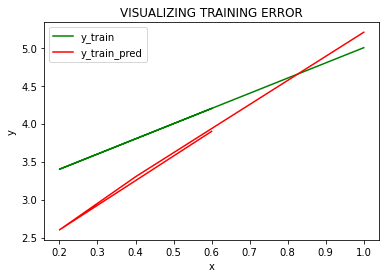

In [57]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

In [58]:
x_test

3    0.8
Name: x, dtype: float64

In [61]:
y_test_list = list(y_test)

In [62]:
y_test_pred = []
for i in x_test:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc.round(1))
y_test_pred

[4.6]

In [63]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[-0.00156250000000036]
Mean Square Error:  -0.00156250000000036


**Predict**

In [64]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.8
Predicted y value: 7.88
